<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Первым шагом исследования будет общий осмотр предоставленных данных.

Затем будет проведена предобработка: заполнение некоторых пропусков, смена форматов, корректировка названий.

Далее будут подсчитаны и добавлены в датасет значения необходимые для анализа.

По итогу будет проведен анализ и предоставлены рекоммендации по параметрам для автоматической системы.

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
try:
    df = pd.read_csv('real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод
Датасет содержит информацию о параметрах недвижимости, таких как площадь, этаж, высота потолка и др.

Также имеются косвенные данные о местоположении: удаленность от центра и аэропорта, наличие парков и прудов.

Часть пропусков подлежит автозаполнению, часть придется оставить пустой, дабы не искажать имеющиеся данные.

## Предобработка данных

In [6]:
df.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

In [7]:
df['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [8]:
# значения скорее всего отсутствуют из-за того, что поле "балкон" не обязательно к заполнению, а система не заполняет его нулевым значением.
df['balcony'] = df['balcony'].fillna(0) 
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

In [9]:
df['ponds_around3000'].value_counts()

0.0    14589
1.0     5717
2.0     1892
3.0     1501
Name: ponds_around3000, dtype: int64

In [10]:
# количество пропусков полностью совпадает с количеством нулевых значенией в столбце 'ponds_around3000'
# видимо поле тоже не обязательное, и большинство просто не ставит в нем нули.
df['ponds_nearest'] = df['ponds_nearest'].fillna(0) 

In [11]:
df['parks_around3000'].value_counts()

0.0    15624
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

In [12]:
df[df['parks_nearest'] > 3000] # аналогично ситуации с прудами, видим разницу в 4 единицы, возможно кто-то указал парки дальше трез километров от недвижимости.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1590,3,7500000.0,70.0,2017-07-11T00:00:00,2,NaN,18.0,37.0,13,NaN,...,10.0,0.0,Санкт-Петербург,14878.0,9791.0,0.0,3064.0,1.0,264.0,4.0
10959,9,3000000.0,31.1,2017-03-21T00:00:00,1,NaN,5.0,17.7,2,NaN,...,5.5,0.0,Санкт-Петербург,14821.0,9734.0,0.0,3190.0,1.0,431.0,234.0
19208,17,14950000.0,187.0,2017-10-12T00:00:00,5,3.0,2.0,80.0,2,NaN,...,17.0,1.0,Санкт-Петербург,36805.0,8656.0,0.0,3013.0,3.0,537.0,49.0
19430,9,3900000.0,30.5,2018-02-22T00:00:00,1,2.6,5.0,16.5,1,NaN,...,5.5,0.0,Санкт-Петербург,14821.0,9734.0,0.0,3190.0,1.0,431.0,176.0


In [13]:
df['parks_nearest'] = df['parks_nearest'].fillna(0) # теория подтвердилась, заполняем остальное нулями.

In [14]:
df['locality_name'] = df['locality_name'].fillna('Не указано') # можно было и пропустить, но для красоты заполним.

In [15]:
# переводим в специализированный формат, заодно отбрасываем параметры времени, которые не заполнены.
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')

In [16]:
df['parks_around3000'] = df['parks_around3000'].astype('int32')
df['ponds_around3000'] = df['ponds_around3000'].astype('int32')
df['balcony'] = df['balcony'].astype('int')
df['last_price'] = df['last_price'].astype('int')

In [17]:
df['living_share'] = df['living_area'] / df['total_area']
df['kitchen_share'] = df['kitchen_area'] / df['total_area']

In [18]:
df['floors_total'] = df['floors_total'].fillna(df['floor']) # пропусков совсем мало, заполним их этажами квартир из объявлений.
df['floors_total'] = df['floors_total'].astype('int') # заодно сменим формат.

In [19]:
df['is_apartment'].value_counts() # очень странный столбец, похоже на функцию недолго продержавшуюся на сайте, либо добавленную совсем недавно.

False    2725
True       50
Name: is_apartment, dtype: int64

In [20]:
df.duplicated().sum() # проверяем дубликаты после заполнения пропусков.

0

In [21]:
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}) # пруды и парки в радиусе 3 км. трогать не стал.

Столбцы с расстоянием до центра города и до аэропорта заполнить не представляется возможным. Значения должны генерироваться автоматически в зависимости от адреса, которого в датасете нет. Схожесть числа пропусков позволяет предположить, что этот параметр был добавлен уже после размещения и закрытия значительной части объявлений.

Высота потолка - слишком специфический параметр, объективно вычислить который по другим имеющимся параметрам нельзя. Слишком большая доля пропусков делает заполнение средним значением нерелеватным.

Также считаю необоснованным заполнение средним значением столбца с количество дней, а расчитать индивидуально не представляется возможным.

In [22]:
df['total_images'] = df['total_images'].astype('int32')
df['total_area'] = df['total_area'].astype('float32')
df['rooms'] = df['rooms'].astype('int32')
df['floor'] = df['floor'].astype('int32')
df['ponds_nearest'] = df['ponds_nearest'].astype('float32')
df['parks_nearest'] = df['parks_nearest'].astype('float32')

## Расчёты и добавление результатов в таблицу

In [23]:
df['square_price'] = df['last_price'] / df['total_area']
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].astype('datetime64[M]')
df['year'] = df['first_day_exposition'].dt.year

In [24]:
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
df['floor_type'] = df.apply(floor_type, axis=1)

In [25]:
weekdays = ["Понедельник", "Вторник", "Среда", "Четверг", "Пятница", "Суббота", "Воскресенье"]
df['weekday'] = df['weekday'].replace([0, 1, 2, 3, 4, 5, 6], weekdays)
df['weekday'].value_counts()

Четверг        4295
Вторник        4183
Пятница        4000
Среда          3974
Понедельник    3612
Суббота        1936
Воскресенье    1699
Name: weekday, dtype: int64

## Исследовательский анализ данных

Text(0, 0.5, 'Количество объявлений')

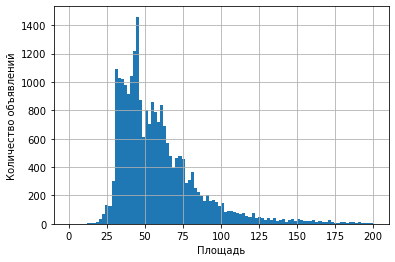

In [26]:
a = df['total_area'].hist(bins=100, range=(0, 200))
a.set_xlabel('Площадь')
a.set_ylabel('Количество объявлений')

Подавляющее большинство размещенных на сайте объектов находятся в диапазоне площадей от 25 до 100 квадратных метров.

In [27]:
df.query('total_area > 200') # проверял количество объявлений свыше определенной площади, для ограничения диапазона на графике.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,living_share,kitchen_share,square_price,weekday,month,year,floor_type
155,8,96000000,317.000000,2017-07-07,4,3.50,3,183.0,3,NaN,...,3,366.0,62.0,0.577287,NaN,302839.116719,Пятница,2017-07-01,2017,последний
464,15,66571000,280.299988,2015-06-11,6,5.20,8,159.5,7,NaN,...,1,616.0,578.0,0.569033,0.075276,237499.118442,Четверг,2015-06-01,2015,другой
492,18,95000000,216.000000,2017-12-05,4,3.00,5,86.0,4,NaN,...,3,620.0,14.0,0.398148,0.356481,439814.814815,Вторник,2017-12-01,2017,другой
509,5,90000000,225.000000,2016-06-26,6,NaN,4,134.0,2,NaN,...,2,519.0,416.0,0.595556,0.086667,400000.000000,Воскресенье,2016-06-01,2016,другой
521,20,25717300,230.100006,2015-01-21,3,NaN,3,130.0,1,NaN,...,3,278.0,1441.0,0.564972,0.113429,111765.751055,Среда,2015-01-01,2015,первый
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23005,20,30750000,297.500000,2018-09-09,6,3.14,4,181.8,2,NaN,...,3,40.0,42.0,0.611092,0.073613,103361.344538,Воскресенье,2018-09-01,2018,другой
23281,20,24800000,231.199997,2015-01-21,6,3.10,5,99.8,4,NaN,...,1,795.0,NaN,0.431661,0.118512,107266.437402,Среда,2015-01-01,2015,другой
23327,19,34400000,215.000000,2019-03-15,5,2.75,4,82.4,4,NaN,...,0,0.0,NaN,0.383256,0.186512,160000.000000,Пятница,2019-03-01,2019,последний
23400,17,30000000,213.000000,2017-09-28,7,3.40,5,151.4,5,NaN,...,3,30.0,299.0,0.710798,0.144601,140845.070423,Четверг,2017-09-01,2017,последний


<AxesSubplot:>

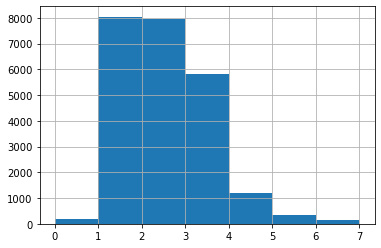

In [28]:
df['rooms'].hist(bins=7, range=(0,7))

Наибольшее количество объявлений с 1-4 комнатами, количество объявлений с 7+ комнатами вынесено за пределы гистограммы по причине слишком малых значений.

In [29]:
df['rooms'].value_counts() # для выбора параметров графика.

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

<AxesSubplot:>

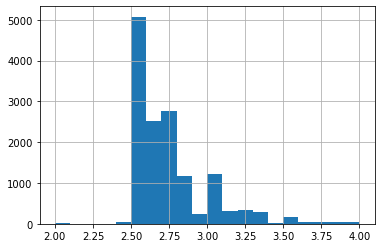

In [30]:
df['ceiling_height'].hist(bins=20, range=(2, 4)) # вообще я бы диапазон от 2.4 поставил, но так можно подметить выбивающееся значение для одного из пунктов задания.

Наибольшее количество жилых помещений имеют потолки высотой от 2.4 до 2.8 м. 
Потолки выше 3.5 м. встречаются довольно редко, также имеются объявления с потолком в 2 м.
Отбросив их, график можно сделать чуть нагляднее.

<AxesSubplot:>

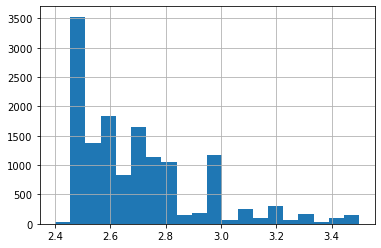

In [31]:
df['ceiling_height'].hist(bins=20, range=(2.4, 3.5))

(-50.0, 2000.0)

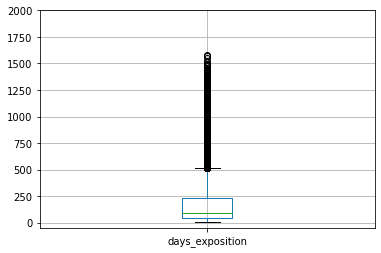

In [32]:
df.boxplot(column='days_exposition') # смотрим по какому промежутку строить гисторграмму.
plt.ylim(-50, 2000)

<AxesSubplot:>

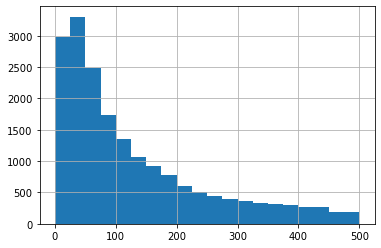

In [33]:
df['days_exposition'].hist(bins=20, range=(0, 500)) # изначально ставил 800, нагляднее график не становится.

<AxesSubplot:>

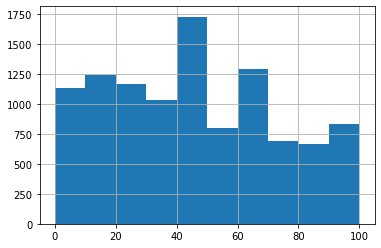

In [34]:
df['days_exposition'].hist(bins=10, range=(0, 100))

Тут все достаточно предсказуемо, наибольшее число продаж приходится на период от 40 до 70 дней.

In [35]:
df['days_exposition'].mean()

180.88863436982163

In [36]:
df['days_exposition'].median()

95.0

Почти двукратная разница в средних значениях говорит о том, что имеется часть объявлений провисевших на сайте несколько лет. Скорее всего это незакрытые , либо крайне невостребованые лоты.

(-50000.0, 20000000.0)

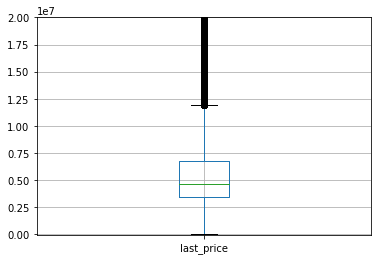

In [37]:
df.boxplot(column='last_price')
plt.ylim(-50000, 20000000)

<AxesSubplot:>

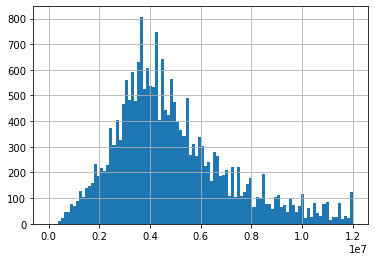

In [38]:
df['last_price'].hist(bins=100, range=(0, 12000000))

Большая часть объявлений сконцетрирована в диапазонецен от 3 до 12 миллионов рублей, внутри этой выборки распределение достаточно равномерное.

In [39]:
test_data = df.query('1000000 < last_price <= 12000000')
test_data = test_data.query('5 >= ceiling_height >= 2.40')
test_data = test_data.query('total_area < 200')
test_data = test_data.query('rooms <=7')

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

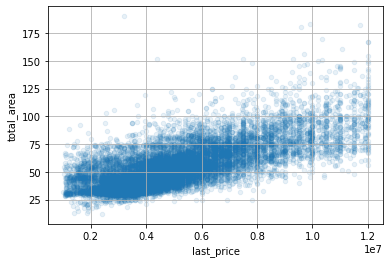

In [40]:
test_data.plot(x='last_price', y='total_area', kind='scatter', alpha= 0.1, grid=True)

В целом логично, что с увеличением площади, растет и цена, однако зависимость не такая сильная, что говорит о влиянии прочих факторов.

<AxesSubplot:xlabel='last_price', ylabel='city_centers_nearest'>

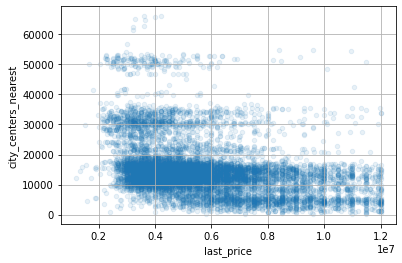

In [41]:
test_data.plot(x='last_price', y='city_centers_nearest', kind='scatter', alpha= 0.1, grid=True)

Судя по диаграмме, "элитными" можно назвать районы в радиусе примерно 20 км. от центра.

<AxesSubplot:xlabel='rooms'>

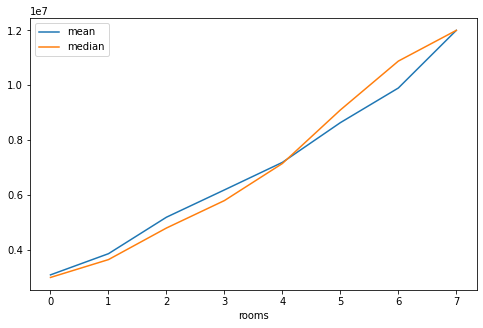

In [42]:
test_data.pivot_table(index='rooms', values='last_price', aggfunc=('median', 'mean')).plot(figsize=(8, 5))

Больше комнат - выше цены, ничего неожиданного.

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Графики подобно следующему выглядят довольно васянскими, но какую-никакую информацию они дают, так что я решил их оставить для большинства значений.
</div>

<AxesSubplot:xlabel='rooms'>

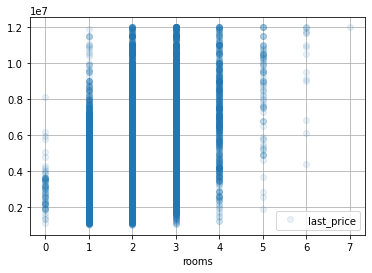

In [43]:
test_data.plot(x='rooms', y='last_price', style='o', alpha=0.1, grid=True)

<AxesSubplot:xlabel='weekday'>

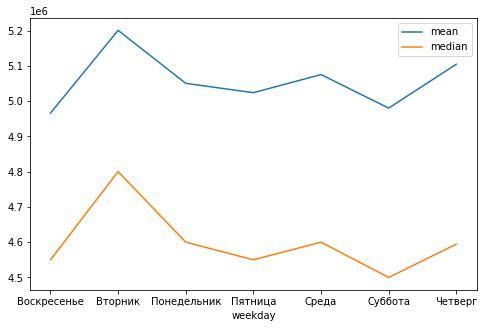

In [44]:
test_data.pivot_table(index='weekday', values='last_price', aggfunc=('median', 'mean')).plot(figsize=(8, 5))

Можно предположить, что в выходные размещают либо менее дорогие лоты, либо меньше элитного жилья.

<AxesSubplot:xlabel='last_price', ylabel='weekday'>

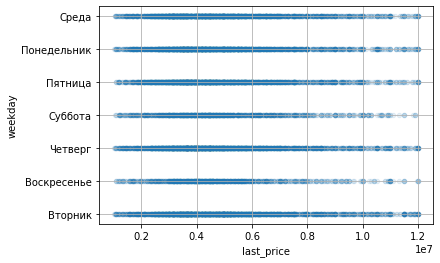

In [45]:
test_data.plot(x='last_price', y='weekday', kind='scatter', alpha= 0.1, grid=True)

На этой диаграмме видно, что разница в средних значениях обусловлена меньшим количеством дорогих объявлений в в субботу и воскресенье.

<AxesSubplot:xlabel='month'>

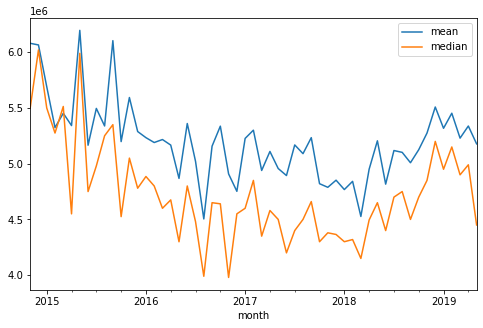

In [46]:
test_data.pivot_table(index='month', values='last_price', aggfunc=('median', 'mean')).plot(figsize=(8, 5))

Единственный проседающий месяц - Июнь, скорее всего из-за начала сезона отпусков.

<AxesSubplot:xlabel='year'>

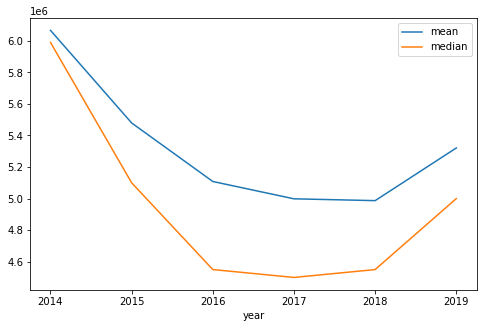

In [47]:
test_data.pivot_table(index='year', values='last_price', aggfunc=('median', 'mean')).plot(figsize=(8, 5))

<AxesSubplot:xlabel='last_price', ylabel='year'>

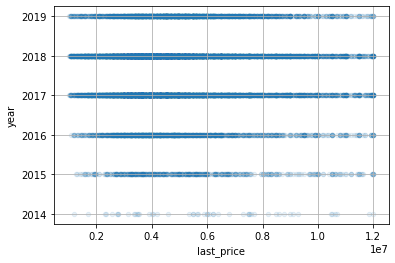

In [48]:
test_data.plot(x='last_price', y='year', kind='scatter', alpha= 0.1, grid=True)

В первые годы на сайте размещали меньше объявлений, что давало заметно более высокие средние значения, на третий год ситуация выравнялась. Последний год вероятно неполный.

<AxesSubplot:xlabel='floor_type'>

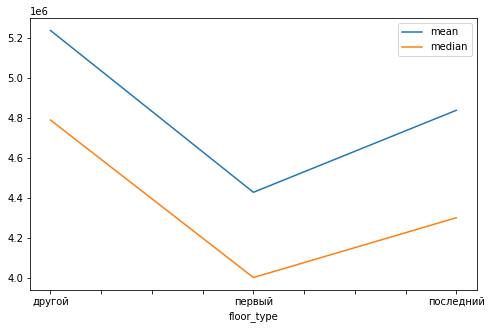

In [49]:
test_data.pivot_table(index='floor_type', values='last_price', aggfunc=('median', 'mean')).plot(figsize=(8, 5))

<AxesSubplot:xlabel='last_price', ylabel='floor_type'>

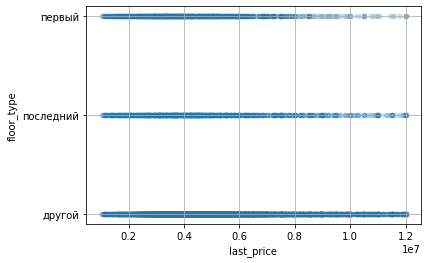

In [50]:
test_data.plot(x='last_price', y='floor_type', kind='scatter', alpha= 0.1, grid=True)

Жилье на последнем этаже, в среднем дороже чем на первом.

In [51]:
test_data[['last_price', 'total_area', 'rooms', 'city_centers_nearest']].corr()

,last_price,total_area,rooms,city_centers_nearest
last_price,1.000000,0.714474,0.468782,-0.349101
total_area,0.714474,1.000000,0.802025,-0.141192
rooms,0.468782,0.802025,1.000000,-0.090877
city_centers_nearest,-0.349101,-0.141192,-0.090877,1.000000


Как видим, наибольшее вляние на цену оказывает площадь, удаленность от центра - наименее влиятельный из трех факторов.

array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>,
        <AxesSubplot:xlabel='city_centers_nearest', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot:xlabel='city_centers_nearest', ylabel='total_area'>],
       [<AxesSubplot:xlabel='last_price', ylabel='rooms'>,
        <AxesSubplot:xlabel='total_area', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='city_centers_nearest', ylabel='rooms'>],
       [<AxesSubplot:xlabel='last_price', ylabel='city_centers_nearest'>,
        <AxesSubplot:xlabel='total_area', ylabel='city_centers_nearest'>,
        <AxesSubplot:xlabel='rooms', ylabel='city_centers_nearest'>,
        <AxesSubp

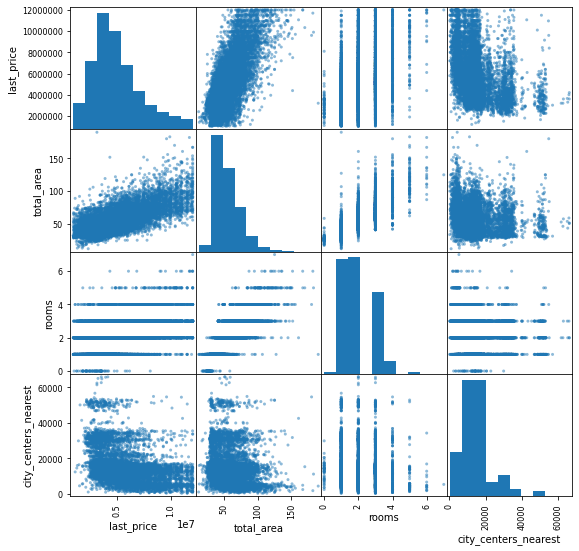

In [52]:
pd.plotting.scatter_matrix(test_data[['last_price', 'total_area', 'rooms', 'city_centers_nearest']], figsize=(9, 9)) 

График подтверждает зависимость цены от площади, а также позволяет предположить, что большинство дорогих квартир сосредоточены в радиусе 20км. от центра.

Выделим 10 наиболее часто встречающихся населенных пунктов.

In [53]:
df['locality_name'].value_counts().head(10) # находим топ 10 самых представленных населенных пунктов.

Санкт-Петербург      15721
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

In [54]:
top_10 = ["Санкт-Петербург", "посёлок Мурино", "посёлок Шушары", "Всеволожск", "Пушкин", "Колпино", "посёлок Парголово", "Гатчина", "деревня Кудрово", "Выборг"]
top_10_data = df.query('locality_name in @top_10')
top_10_data['locality_name'].value_counts()

Санкт-Петербург      15721
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

<AxesSubplot:xlabel='locality_name'>

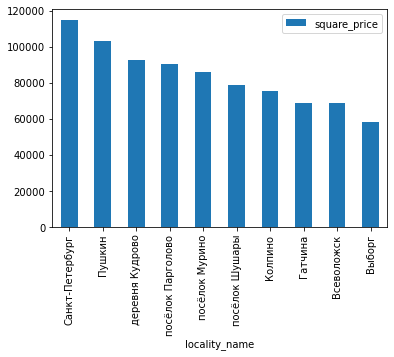

In [55]:
top_10_data.pivot_table(index='locality_name', values='square_price', aggfunc='mean').sort_values(by='square_price', ascending=False).plot(kind='bar')

Самое дорогое жилье предсказуемо в Санкт-Петербурге, также выделяется город Пушкин.

Проведем более подробное исследование по Санкт-Петербургу.

<AxesSubplot:xlabel='km_to_centre'>

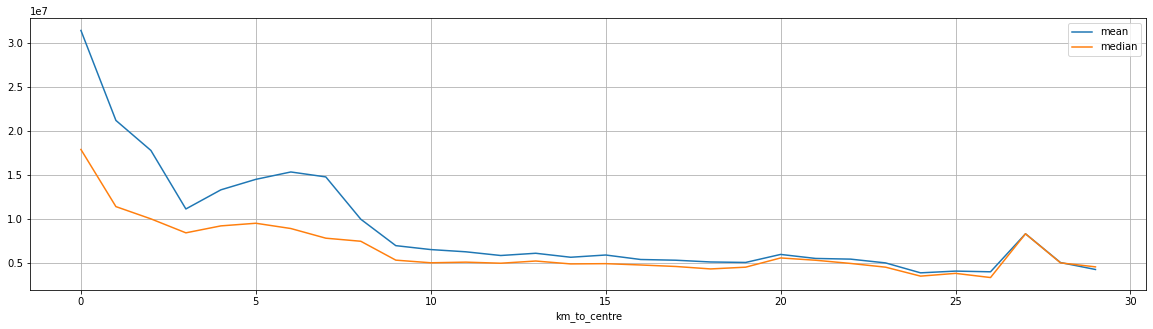

In [56]:
df['km_to_centre'] = df['city_centers_nearest'] / 1000 # создаем столбец с расстояниями в километрах
df['km_to_centre'] = df['km_to_centre'].round(0) # округляем до целых значений
spb_data = df.query('locality_name == "Санкт-Петербург"')
spb_data.pivot_table(index='km_to_centre', values='last_price', aggfunc=('median', 'mean')).plot(figsize=(20, 5), grid=True) # по хорошему надо делений добавить по горизонтали, но я что то забыл как -_-.

Исходя из графика границей центра можно представить расстояние в 2 или 7 километров. Выберем 7, поскольку после него уже нет значительного роста значений.

In [68]:
# берем срез только по центральному району СПБ.
centre_data = spb_data.query('km_to_centre <= 7')
# убираем аномалии, аналогично общим данным, но с другим диапазоном цен
centre_data = centre_data.query('total_area <= 200')
centre_data = centre_data.query('rooms <= 7')
centre_data = centre_data.query('2000000 < last_price <= 26000000')
centre_data = centre_data.query(' 2.4 <= ceiling_height <= 5')

<AxesSubplot:>

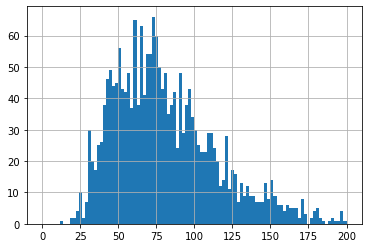

In [69]:
centre_data['total_area'].hist(bins=100, range=(0, 200))

Относительно общей базы, распределение по площади более ровное и в целом средние значения несколько выше.

<AxesSubplot:>

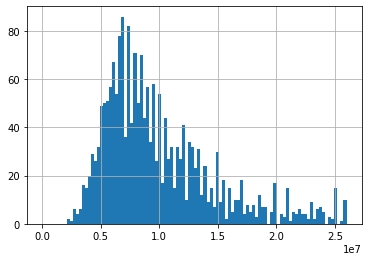

In [70]:
centre_data['last_price'].hist(bins=100, range=(0, 26000000)) #

В центре Санкт-Петербурга и средние цены выше и разброс значений шире.df['rooms'].hist(bins=7, range=(0,7))

<AxesSubplot:>

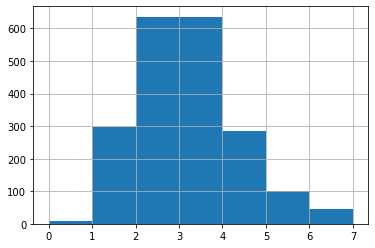

In [60]:
centre_data['rooms'].hist(bins=7, range=(0,7))

Доминируют двухкомнатные и трехкомнатные квартиры. Однкомнатных и четырехкомнатных почти одинаковое количество, что резко контрастирует с общей базой, где "однушки" встречаются в разы чаще. 

<AxesSubplot:>

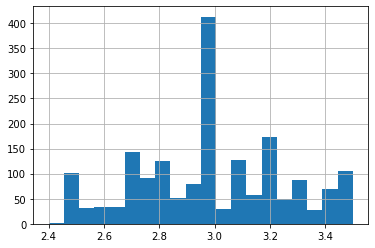

In [71]:
centre_data['ceiling_height'].hist(bins=20, range=(2.4, 3.5))

Потолки в центре тоже явно выше, выделяются 3 метра по сравнению с 2.4 в общей статистике.

В заключение изучим влиянием разных факторов на цену квартиры в центре города.

(0.0, 7.0)

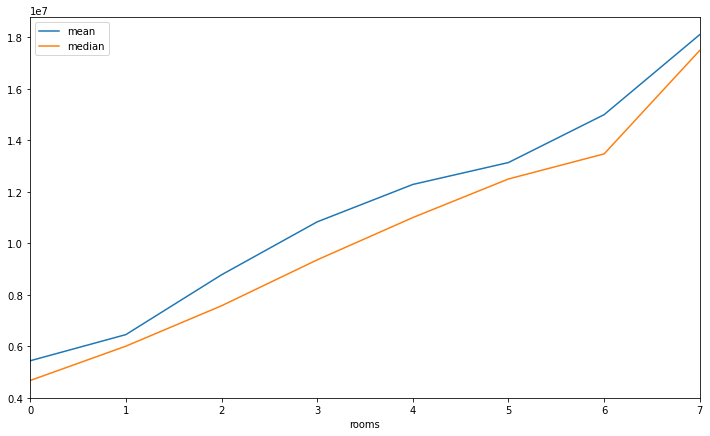

In [62]:
centre_data.pivot_table(index='rooms', values='last_price', aggfunc=('median', 'mean')).plot(figsize=(12, 7))
plt.xlim(0, 7)

Графики средних значений расходятся сильнее чем при изначальных данных, но и сами средние значения гораздо выше.

<AxesSubplot:xlabel='floor_type'>

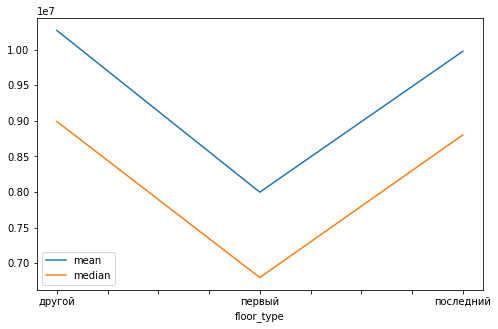

In [63]:
centre_data.pivot_table(index='floor_type', values='last_price', aggfunc=('median', 'mean')).plot(figsize=(8, 5))

Отклонение среднего от медианы для последних этажей явно сильнее на общих данных.

<AxesSubplot:xlabel='km_to_centre'>

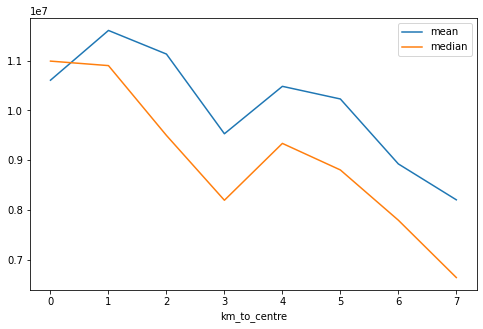

In [64]:
centre_data.pivot_table(index='km_to_centre', values='last_price', aggfunc=('median', 'mean')).plot(figsize=(8, 5))

В целом без неожиданностей, разве что проседает радиус в 3 км. Возможно на этом радиусе находится какой то объект значительно снижающий цену окрестного жилья.

In [65]:
centre_data[['last_price', 'total_area', 'rooms', 'city_centers_nearest']].corr()

,last_price,total_area,rooms,city_centers_nearest
last_price,1.000000,0.714605,0.442293,-0.159172
total_area,0.714605,1.000000,0.793673,-0.207957
rooms,0.442293,0.793673,1.000000,-0.208207
city_centers_nearest,-0.159172,-0.207957,-0.208207,1.000000


array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>,
        <AxesSubplot:xlabel='city_centers_nearest', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot:xlabel='city_centers_nearest', ylabel='total_area'>],
       [<AxesSubplot:xlabel='last_price', ylabel='rooms'>,
        <AxesSubplot:xlabel='total_area', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='city_centers_nearest', ylabel='rooms'>],
       [<AxesSubplot:xlabel='last_price', ylabel='city_centers_nearest'>,
        <AxesSubplot:xlabel='total_area', ylabel='city_centers_nearest'>,
        <AxesSubplot:xlabel='rooms', ylabel='city_centers_nearest'>,
        <AxesSubp

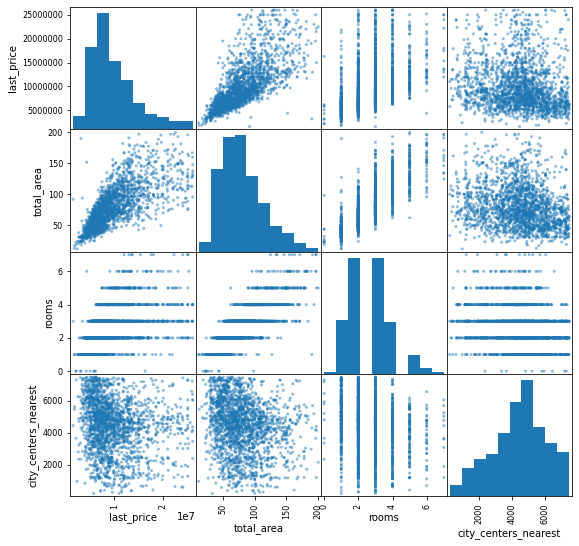

In [66]:
pd.plotting.scatter_matrix(centre_data[['last_price', 'total_area', 'rooms', 'city_centers_nearest']], figsize=(9, 9)) 

В целом влияние площади и количества комнат осталось на уровне общих данных. Значимость расстояния до центра сильно просела, возможно из-за уменьшившегося разброса, но скорее всего из-за слишком большой разницей между центром и остальным городом.

## Общий вывод
Предоставленный датасет обладает полным объемом наиболее важных данных, таких как общая площадь, цена, количество комнат и этаж. Значительная часть полезных второстепенных данных представлена не полностью, вероятно в виду позднего добавления на портал или в алгоритм автоматического вычисления. В целом данные пригодны для анализа. Были изменены форматы даты и времени для получения дополнительных данных, также были изменены числовые форматы для удобства визуализации и экономии памяти. Часть параметров была добавлена вручную.

При исследовании параметров, наибольшую корреляцию с ценой показала площадь недвижимости. Несмотря на значительный скачок цен при исследовании только центрального района, коэффициенты корреляции цены для общей площади и количества комнат остались практически неизменными. Зависимость от расстояния до центра в самом центральном районе значительно снижается.

Рекомендуется сделать данные вводимые пользователями, такие как площадь балкона и общее количество этажей, обязательными к заполнению. Данные определяемые автоматически, такие как расстояние до центра или аэропорта, могут отсутствовать в виду их добавления уже после закрытия объявления, однако для большей точности вычисления дополнительных параметров влияющих на цену, желательно добавить их автоматически основываясь на адресе недвижимости из оъйявления.
